In [129]:
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"] = (10,10)
plt.figure(figsize=(20, 20))
random_seed = 42

<Figure size 1440x1440 with 0 Axes>

In [130]:
def func(x):
    return np.exp(x[0]) + (x[0] + x[1])**2

In [131]:
np.random.seed(random_seed)
w_0 = np.asarray([1,1])
w = w_0.copy()
w_list = [w.copy()]
eps = 1e-5
max_der = 1

while max_der > eps:
    der1_x = np.exp(w[0]) + 2*(w[0] + w[1])
    der2_xx = np.exp(w[0]) + 2
    der1_y = 2*(w[0] + w[1])
    der2_yy = 2
    der2_xy = 2
    max_der = max(der1_x, der1_y)
    phi1_r = -(der1_x)**2 - (der1_y)**2
    phi2_r = der2_xx*(der1_x)**2 + 2*der2_xy*der1_x*der1_y + der2_yy*(der1_y)**2
    lr = -phi1_r / phi2_r
    #print(der1_y.astype(np.float64), der1_x)
    w = w - lr * np.asarray([der1_x.astype(np.float64), der1_y.astype(np.float64)])
    w_list.append(w.copy())
    
w_list = np.array(w_list)
w

array([-10.29205045,  10.29206265])

In [132]:
w_true = np.random.normal(size=(2, ))
X = np.random.uniform(-5, 5, (1, 2))
X *= (np.arange(2) * 2 + 1)[np.newaxis, :] 
Y = X.dot(w_true) + np.random.normal(0, 2, 1)

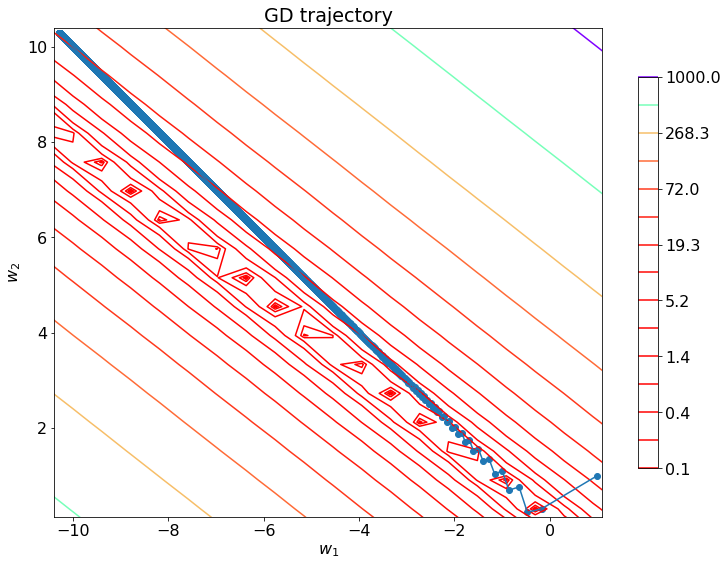

In [133]:
matplotlib.rcParams.update({'font.size': 16})

# Визуализируем градиентный спуск
A, B = np.meshgrid(np.linspace(-30, 30, 100), np.linspace(-30, 30, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i,j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

CS = plt.contour(A, B, levels, levels=np.logspace(-1, 3, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()